# Kaggle Housing Prices Regression

In [1]:
import warnings

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
original = pd.read_csv('datasets/housing/train.csv')
original = original[original.GrLivArea < 4000]
original_test = pd.read_csv('datasets/housing/test.csv')
original = pd.concat([original, original_test], axis=0)
original.drop('Id', axis=1, inplace = True)
original = original.reset_index()

In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2915 non-null   int64  
 1   MSSubClass     2915 non-null   int64  
 2   MSZoning       2911 non-null   object 
 3   LotFrontage    2429 non-null   float64
 4   LotArea        2915 non-null   int64  
 5   Street         2915 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2915 non-null   object 
 8   LandContour    2915 non-null   object 
 9   Utilities      2913 non-null   object 
 10  LotConfig      2915 non-null   object 
 11  LandSlope      2915 non-null   object 
 12  Neighborhood   2915 non-null   object 
 13  Condition1     2915 non-null   object 
 14  Condition2     2915 non-null   object 
 15  BldgType       2915 non-null   object 
 16  HouseStyle     2915 non-null   object 
 17  OverallQual    2915 non-null   int64  
 18  OverallC

In [5]:
data = original.copy()

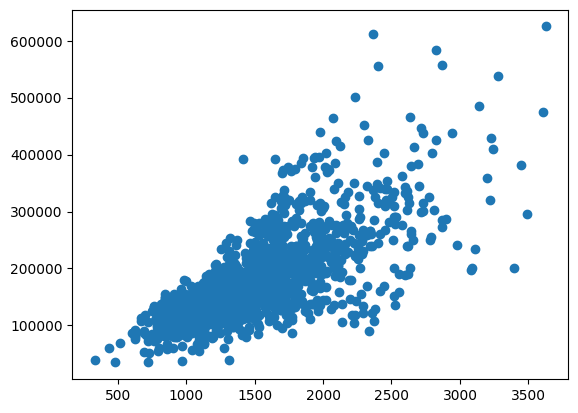

In [6]:
#Outliers > 4000
plt.scatter(data.GrLivArea, data.SalePrice)

<Axes: >

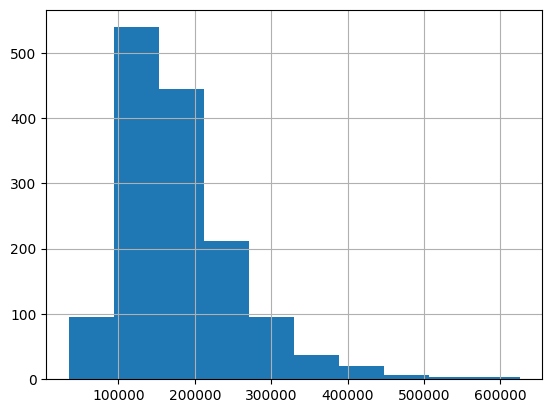

In [7]:
data.SalePrice.hist()
#Sale Price is quite skewed, so taking a log transform makes sense

<Axes: >

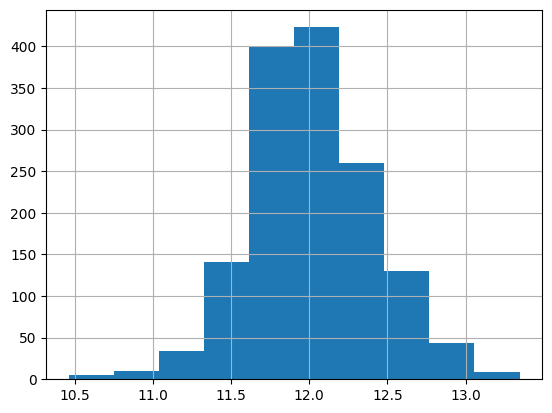

In [8]:
data.SalePrice = np.log1p(data.SalePrice)
data.SalePrice.hist()

## Data Cleaning

In [9]:
def check_missing(df):
    missing_info = df.isna().sum()
    missing_info = missing_info[missing_info > 0]
    return pd.DataFrame({
        'Column': missing_info.index,
        'Missing_Count': missing_info.values,
        'Dtype': df.dtypes[missing_info.index].values
    }).sort_values(by='Missing_Count', ascending=False)

check_missing(data)[check_missing(data).Dtype == 'object']

,Column,Missing_Count,Dtype
30,PoolQC,2907,object
32,MiscFeature,2810,object
2,Alley,2717,object
31,Fence,2345,object
6,MasVnrType,1765,object
22,FireplaceQu,1420,object
28,GarageQual,159,object
25,GarageFinish,159,object
29,GarageCond,159,object
23,GarageType,157,object


In [10]:
#Since all of these have very few missing values, we will fill na with the mode.
data['Electrical'].fillna('Sbrkr', inplace=True)
data['SaleType'].fillna('WD', inplace=True)
data['Utilities'].fillna('AllPub', inplace=True)
data['MSZoning'].fillna('RL', inplace=True)
data['Functional'].fillna('Typ', inplace=True)
data['Exterior1st'].fillna('VinylSD', inplace=True)
data['Exterior2nd'].fillna('VinylSD', inplace=True)
data['KitchenQual'].fillna('TA', inplace=True)

/tmp/ipykernel_31137/2089537428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Electrical'].fillna('Sbrkr', inplace=True)
/tmp/ipykernel_31137/2089537428.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [11]:
check_missing(data)

,Column,Missing_Count,Dtype
23,PoolQC,2907,object
25,MiscFeature,2810,object
1,Alley,2717,object
24,Fence,2345,object
2,MasVnrType,1765,object
26,SalePrice,1459,float64
15,FireplaceQu,1420,object
0,LotFrontage,486,float64
21,GarageQual,159,object
17,GarageYrBlt,159,float64


In [12]:
for col in data.columns:
    if data[col].dtype == 'O':
        data[col].fillna('None', inplace = True)

/tmp/ipykernel_31137/3819600217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('None', inplace = True)


In [13]:
data.drop(['PoolQC', 'MiscFeature'], axis=1, inplace=True)

In [14]:
#The following values can safely be filled with zeroes.
data[['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 
      'TotalBsmtSF', 'GarageCars', 'GarageArea', 'MasVnrArea']] = data[['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 
      'TotalBsmtSF', 'GarageCars', 'GarageArea', 'MasVnrArea']].fillna(0)

#GarageYrBlt has 159 missing values, GarageArea has 157 zeroes.
#So we fill it with 0 where GarageArea is 0, and with the Year when house was built otherwise.
data['GarageYrBlt'] = np.where(data['GarageArea'] == 0, 0, data['GarageYrBlt'].fillna('YrBlt'))

In [15]:
#Since LotFrontage is length of street connected to property, we can take median based on neighborhood
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [16]:
# Some numerical features are actually really categories: the model might assume a linear relationship where it doesn't exist
data = data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [17]:
#Converting some categorical features to numeric, where appropriate
categorical_to_numeric_cols = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'Fence']
categorical_to_numeric_cols_2 = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
for i in categorical_to_numeric_cols:
    data[i] = data[i].replace({'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
for i in categorical_to_numeric_cols_2:
    data[i] = data[i].replace({'None': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

/tmp/ipykernel_31137/1732184371.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i] = data[i].replace({'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
/tmp/ipykernel_31137/1732184371.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i] = data[i].replace({'None': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})


In [18]:
#Some more conversions
data = data.replace({'Fence': {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                    'PavedDrive': {'N':0, 'P':1, 'Y':2},
                    'GarageFinish': {'None': 0, 'Unf':1, 'RFn':2, 'Fin':3},
                    'Functional': {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4,'Min2':5,'Min1':6,'Typ':7},
                    'Street':{'Grvl':1, 'Pave':2},
                    'BsmtFinType1':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                    'BsmtFinType2':{'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                    'BsmtExposure':{'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
                    'Utilities':{'NoSeWa':1, 'AllPub':2},
                    'LotShape':{'IR3':1, 'IR2':2, 'IR1':1, 'Reg':4},
                    'Alley':{'None':0, 'Grvl':1, 'Pave':2},
                    'CentralAir':{'N':1, 'Y':2}
                    })

/tmp/ipykernel_31137/3741212728.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Fence': {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},


In [19]:
data = data.drop('index', axis=1)

In [20]:
data['TotalFloorSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
data['OverallGrade'] = data['OverallQual'] * data['OverallCond']
data['KitchenGrade'] = data['KitchenAbvGr'] * data['KitchenQual']
data['GarageGrade'] = data['GarageArea'] * data['GarageQual'] * data['GarageCond']
data["AllPorchSF"] = data["OpenPorchSF"] + data["EnclosedPorch"] + data["3SsnPorch"] + data["ScreenPorch"]
data['BathGrade'] = data['FullBath'] + data['HalfBath']

In [21]:
#Checking skewed features
from scipy.stats import skew
numeric_feats = data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
Alley,4.135075
EnclosedPorch,4.000796
ScreenPorch,3.943508


In [22]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if feat != 'SalePrice':
        data[feat] = boxcox1p(data[feat], lam)

There are 60 skewed numerical features to Box Cox transform


In [23]:
from sklearn.preprocessing import StandardScaler
numeric_features = data.drop('SalePrice', axis=1).select_dtypes(include=[np.number]).columns

# Apply StandardScaler
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

#### Data cleaning ends here.

In [24]:
df = pd.get_dummies(data)

In [25]:
corr = df[:1456].corr().sort_values(by = 'SalePrice', ascending=False)
corr.SalePrice[:40]

SalePrice                1.000000
TotalFloorSF             0.819422
OverallQual              0.807622
GrLivArea                0.732932
ExterQual                0.680334
KitchenQual              0.662501
GarageCars               0.650474
OverallGrade             0.616751
BathGrade                0.613297
1stFlrSF                 0.612990
GarageFinish             0.610831
YearBuilt                0.587150
FullBath                 0.580615
YearRemodAdd             0.568959
FireplaceQu              0.540472
TotRmsAbvGrd             0.539054
Foundation_PConc         0.531036
BsmtQual                 0.520173
GarageArea               0.510752
GarageGrade              0.505486
Fireplaces               0.505155
HeatingQC                0.468903
OpenPorchSF              0.456317
TotalBsmtSF              0.451879
KitchenGrade             0.443575
MasVnrArea               0.425575
GarageType_Attchd        0.416383
LotArea                  0.400057
MSSubClass_SC60          0.397094
BsmtExposure  

In [26]:
X = df[:1456].drop('SalePrice', axis=1)
y = df[:1456].SalePrice

In [27]:
def CrossValidation(model, param_grid):
    from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring="neg_root_mean_squared_error")
    grid_search.fit(X, y)
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Best RMSE: {-grid_search.best_score_:.4f}")

def predict(model):
    model.fit(X, y)
    y_preds = model.predict(df[1456:].drop('SalePrice', axis=1))
    y_preds = np.expm1(y_preds)
    return y_preds

## 1. ElasticNet

In [85]:
from sklearn.linear_model import ElasticNetCV
elasticnet = ElasticNetCV(
    alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],  # Mix of L1 and L2
    cv=5,  # 5-fold cross-validation
    max_iter=10000,
    verbose = 2
)
elasticnet.fit(X, y)
y_preds = predict(elasticnet)

Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out

Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out of 007
Path: 005 out of 007
Path: 006 out of 007
Path: 000 out of 007
Path: 001 out of 007
Path: 002 out of 007
Path: 003 out of 007
Path: 004 out

In [86]:
y_preds = np.expm1(elasticnet.predict(df[1456:].drop('SalePrice', axis=1)))

In [87]:
final_prices = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': y_preds})
final_prices.to_csv('ElasticNetPredictions2.csv', index=False)